<a href="https://colab.research.google.com/github/Bisalia/Crud_app/blob/main/pgmpy_Armel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from pgmpy.models import BayesianNetwork
from pgmpy.factors.discrete import TabularCPD
import networkx as nx
import matplotlib.pyplot as plt
from pgmpy.inference import VariableElimination


In [ ]:
# ML=> материал легкийб, PE=> подготовка к экзамину PO=>получил отметку отлично MP => материал разбился
model = BayesianNetwork([('ML', 'PE'), 
                         ('PE', 'PO'), 
                         ('MP', 'PO')])

cpd_ML = TabularCPD('ML', 2, [[0.34], [0.66]])
                    
cpd_PE = TabularCPD('PE', 2, [[0.88, 0.46],[0.12, 0.54]],
                   evidence=['ML'],
                   evidence_card=[2])
print(cpd_PE)

cpd_MP =TabularCPD('MP', 2, [[0.46], [0.54]])

cpd_PO = TabularCPD('PO', 2, [[0.85, 0.54, 0.71, 0.13],
                              [0.15, 0.46, 0.29, 0.87]],
                   evidence=['PE', 'MP'],
                   evidence_card=[2, 2])


print(cpd_PO)


+-------+-------+-------+
| ML    | ML(0) | ML(1) |
+-------+-------+-------+
| PE(0) | 0.88  | 0.46  |
+-------+-------+-------+
| PE(1) | 0.12  | 0.54  |
+-------+-------+-------+
+-------+-------+-------+-------+-------+
| PE    | PE(0) | PE(0) | PE(1) | PE(1) |
+-------+-------+-------+-------+-------+
| MP    | MP(0) | MP(1) | MP(0) | MP(1) |
+-------+-------+-------+-------+-------+
| PO(0) | 0.85  | 0.54  | 0.71  | 0.13  |
+-------+-------+-------+-------+-------+
| PO(1) | 0.15  | 0.46  | 0.29  | 0.87  |
+-------+-------+-------+-------+-------+


In [ ]:

model.add_cpds(cpd_ML, cpd_PE, cpd_MP, cpd_PO)

In [ ]:
model.check_model()

True

model.check_model()

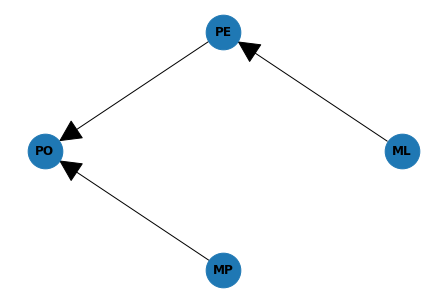

In [ ]:
nx.draw_circular(model, with_labels=True, arrowsize=50, node_size=1200, font_weight="bold")
plt.show()

In [ ]:
#inference by elimination 
inference = VariableElimination(model)

post_PE= inference.query(["PE"], evidence={"ML": 0})

print(post_PE)


+-------+-----------+
| PE    |   phi(PE) |
+=======+===========+
| PE(0) |    0.8800 |
+-------+-----------+
| PE(1) |    0.1200 |
+-------+-----------+


In [ ]:
post_PO = inference.query(["PO"], evidence={"PE": 0, "MP":0})

print(post_PO)

+-------+-----------+
| PO    |   phi(PO) |
+=======+===========+
| PO(0) |    0.8500 |
+-------+-----------+
| PO(1) |    0.1500 |
+-------+-----------+
